In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import datetime as dt
import yfinance as yf
start='2010-01-01'
end=dt.datetime.now()
start,end

('2010-01-01', datetime.datetime(2023, 6, 8, 21, 28, 51, 848196))

In [3]:
df=yf.download('AAPL',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496296,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404013,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434675,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-02,181.029999,181.779999,179.259995,180.949997,180.949997,61945900
2023-06-05,182.630005,184.949997,178.039993,179.580002,179.580002,121946500
2023-06-06,179.970001,180.119995,177.429993,179.210007,179.210007,64848400
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.820007,61889100
2023-06-08,177.895004,179.880005,177.460007,179.710007,179.710007,19008255


In [5]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496296,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404013,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434675,447610800


In [6]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


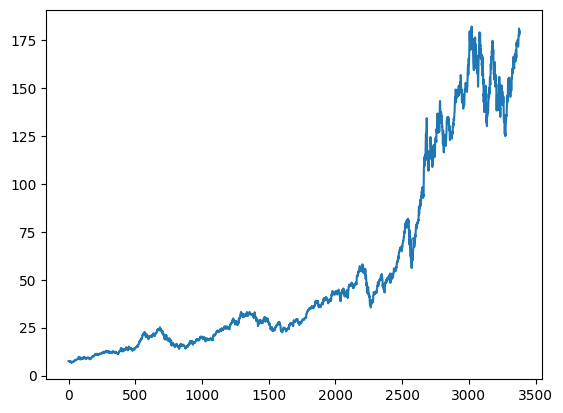

In [7]:
plt.plot(df.Close)

In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3376    158.0656
3377    158.5541
3378    159.0113
3379    159.4554
3380    159.9049
Name: Close, Length: 3381, dtype: float64

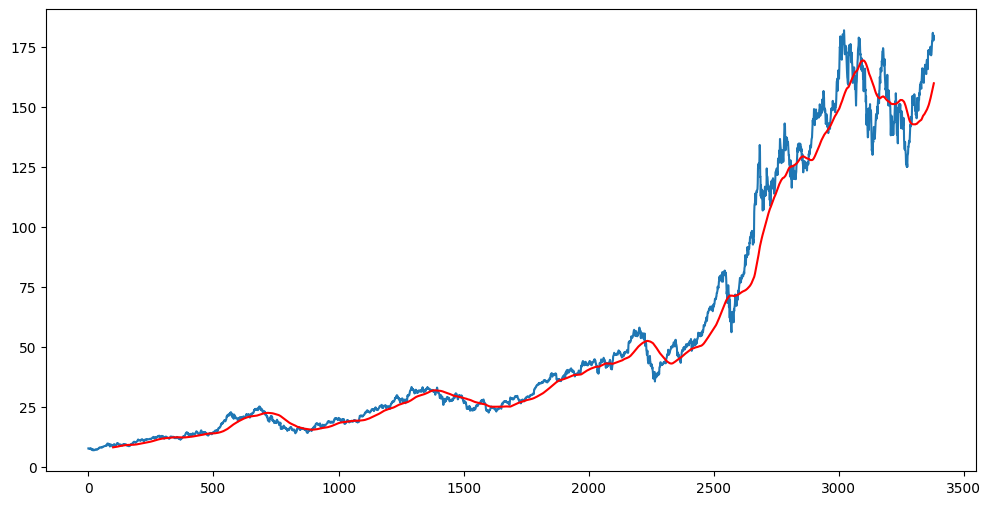

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3376    152.46475
3377    152.48990
3378    152.51520
3379    152.54670
3380    152.60740
Name: Close, Length: 3381, dtype: float64

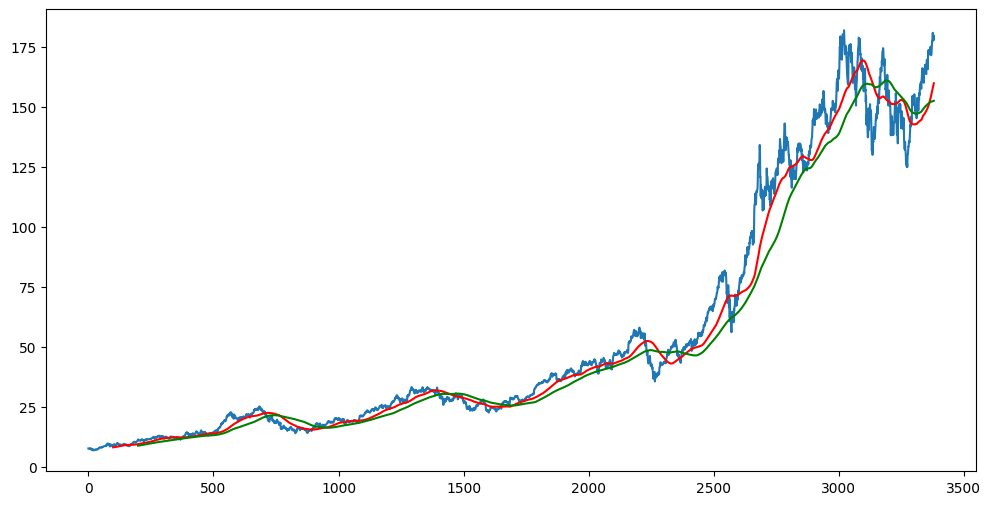

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(3381, 5)

In [13]:
#Splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2366, 1)
(1015, 1)


In [14]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
data_testing.head()

,Close
2366,44.575001
2367,43.767502
2368,43.325001
2369,44.910000
2370,45.634998


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.74051267],
       [0.73689643],
       [0.73274273]])

In [18]:
data_training_array.shape

(2366, 1)

In [19]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

# Model

In [20]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
71/71 [==============================] - 36s 390ms/step - loss: 0.0279
Epoch 2/50
71/71 [==============================] - 28s 400ms/step - loss: 0.0063
Epoch 3/50
71/71 [==============================] - 29s 403ms/step - loss: 0.0056
Epoch 4/50
71/71 [==============================] - 28s 401ms/step - loss: 0.0052
Epoch 5/50
71/71 [==============================] - 36s 507ms/step - loss: 0.0050
Epoch 6/50
71/71 [==============================] - 34s 472ms/step - loss: 0.0050
Epoch 7/50
71/71 [==============================] - 36s 513ms/step - loss: 0.0050
Epoch 8/50
71/71 [==============================] - 37s 515ms/step - loss: 0.0046
Epoch 9/50
71/71 [==============================] - 37s 527ms/step - loss: 0.0043
Epoch 10/50
71/71 [==============================] - 30s 423ms/step - loss: 0.0039
Epoch 11/50
71/71 [==============================] - 30s 416ms/step - loss: 0.0041
Epoch 12/50
71/71 [==============================] - 30s 423ms/step - loss: 0.0033
Epoch 13/50
7

In [27]:
model.save('keras_model')

INFO:tensorflow:Assets written to: keras_model\assets


INFO:tensorflow:Assets written to: keras_model\assets


In [28]:
data_testing.head()

,Close
2366,44.575001
2367,43.767502
2368,43.325001
2369,44.910000
2370,45.634998


In [29]:
past_100_days = data_training.tail(100)

In [34]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)

In [35]:
final_df.head()

,Close
0,37.064999
1,36.982498
2,37.687500
3,38.327499
4,38.450001


In [38]:
input_data=scaler.fit_transform(final_df)
input_data

array([[5.68860801e-04],
       [0.00000000e+00],
       [4.86115977e-03],
       ...,
       [9.80693400e-01],
       [9.71109015e-01],
       [9.84141023e-01]])

In [39]:
input_data.shape

(1115, 1)

In [40]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [41]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1015, 100, 1)
(1015,)


In [42]:
#Making Predictions

y_predicted = model.predict(x_test)

32/32 [==============================] - 8s 132ms/step


In [43]:
y_predicted.shape

(1015, 1)

In [44]:
y_test

array([0.05235216, 0.04678426, 0.0437331 , ..., 0.9806934 , 0.97110902,
       0.98414102])

In [45]:
y_predicted

array([[0.1469751 ],
       [0.14490485],
       [0.14289314],
       ...,
       [0.8743379 ],
       [0.87965095],
       [0.8839611 ]], dtype=float32)

In [47]:
scaler.scale_

array([0.00689524])

In [48]:
scale_factor = 1/0.00689524
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

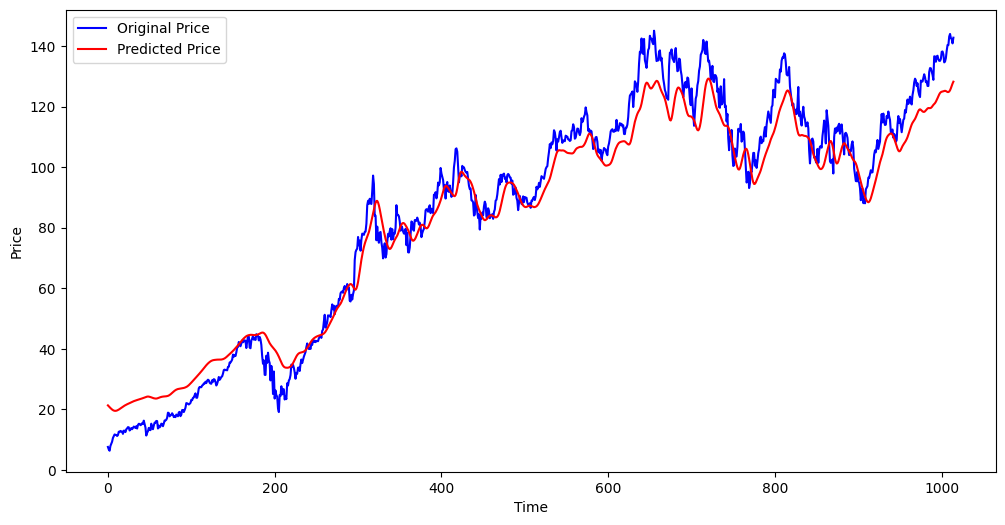

In [49]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()